<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Written digits classification with Keras

In [ ]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# The digits dataset
digits = load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

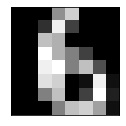

In [ ]:
id = np.random.randint(len(digits.target))
plt.figure(figsize = (2, 2))
plt.imshow(digits.images[id], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Prepare input data
# input
X = digits.data.astype(np.uint8)
n_cols = X.shape[1]

# output
target = digits.target.astype(np.uint8)

# Convert the target to categorical
y = to_categorical(
    target,
    num_classes = len(set(target)),
    dtype = 'uint8')

In [ ]:
len(X)

1797

In [ ]:
target

array([0, 1, 2, ..., 8, 9, 8], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

In [ ]:
# Set up the model architecture
model = Sequential()

In [ ]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 12,060
Trainable params: 12,060
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile the model
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
%%time
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
48/48 [==============================] - 3s 6ms/step - loss: 1.3324 - accuracy: 0.6380 - val_loss: 1.0875 - val_accuracy: 0.6317
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8938 - val_loss: 1.5116 - val_accuracy: 0.6286
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.9278 - val_loss: 0.2707 - val_accuracy: 0.9238
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.1708 - accuracy: 0.9533 - val_loss: 0.5815 - val_accuracy: 0.8254
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9713 - val_loss: 0.1946 - val_accuracy: 0.9524
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.9703 - val_loss: 0.1790 - val_accuracy: 0.9460
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9809 - val_loss: 0.2198 - val_accuracy: 0.9365
Epoch 8/100
4

In [ ]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
history.on_batch_begin

<bound method Callback.on_batch_begin of <keras.callbacks.History object at 0x7f0069a90350>>

In [ ]:
#predictions = model.predict_classes(X_test)
#predictions =  (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

2/2 [==============================] - 0s 5ms/step - loss: 0.1048 - accuracy: 0.9593

Test loss: 0.104825, Test accuracy: 0.959259


In [ ]:
def print_cm(cm):
    #cm : confusion matrix
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [ ]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

 |  0  1  2  3  4  5  6  7  8  9 
---------------------------------
0| 54  0  0  0  1  0  0  0  0  0 
1|  0 53  0  0  0  0  1  0  0  1 
2|  0  2 47  0  0  0  0  0  0  0 
3|  0  0  0 49  0  3  0  0  0  0 
4|  1  0  0  0 54  0  0  0  0  0 
5|  0  1  0  0  0 58  0  0  0  1 
6|  1  0  0  0  0  0 60  0  0  0 
7|  0  0  0  0  0  0  0 51  0  1 
8|  0  2  0  0  0  2  1  0 43  1 
9|  0  1  0  0  0  2  0  0  0 49 


In [ ]:
history.history['loss']

[1.2980217933654785,
 0.3793899118900299,
 0.23385398089885712,
 0.18562527000904083,
 0.16166894137859344,
 0.10864796489477158,
 0.09594720602035522,
 0.07889240235090256,
 0.06997831910848618,
 0.060559362173080444,
 0.05535319820046425,
 0.04786068946123123,
 0.042303264141082764,
 0.03976210951805115,
 0.03497866168618202,
 0.033494092524051666,
 0.02975950390100479,
 0.027595320716500282,
 0.026287861168384552,
 0.02484673075377941,
 0.022477123886346817,
 0.01989387907087803,
 0.018194692209362984,
 0.17568393051624298,
 0.02395693212747574,
 0.018748901784420013,
 0.016247088089585304,
 0.01553046889603138,
 0.013453331775963306,
 0.012641049921512604,
 0.011385432444512844,
 0.010947600938379765,
 0.010131393559277058,
 0.009506930597126484,
 0.009240657091140747,
 0.008870183490216732,
 0.00812589656561613,
 0.008053588680922985,
 0.007597707211971283,
 0.007339843548834324,
 0.007282700389623642,
 0.0070296092890203,
 0.006573253311216831,
 0.0064363060519099236,
 0.00619668

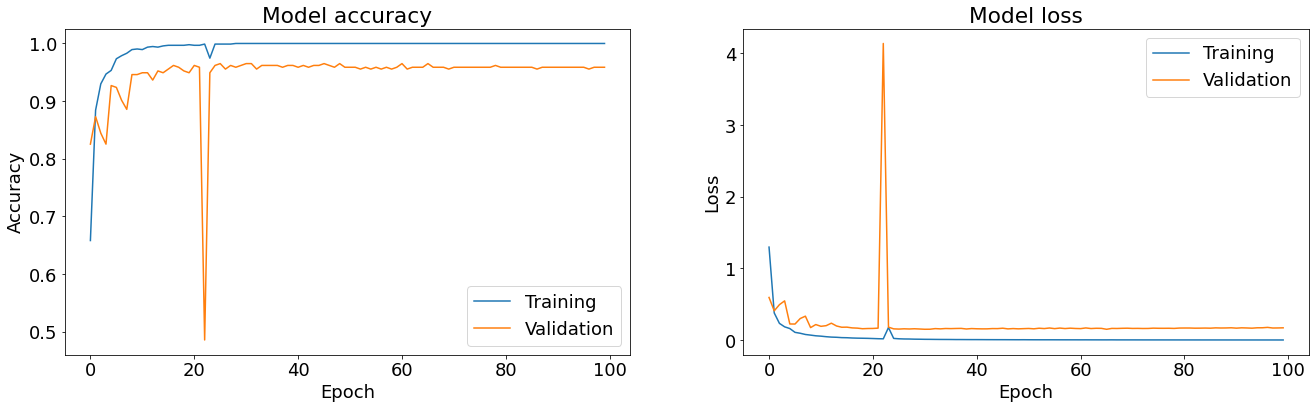

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [ ]:
def show_digit():
    id = np.random.randint(len(predictions))
    XTest = X_test[id].reshape(8, 8)
    plt.figure(figsize = (2, 2))
    plt.imshow(XTest, cmap = 'gray')
    plt.title('Prediction: %d' % predictions[id])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
def show_10_digits():
    fig, ax = plt.subplots(2, 5, figsize = (8, 4))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.3)
    fig.suptitle('Ten Predictions', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})
    
    ids = np.random.randint(len(predictions), size = 10)
    r = 0
    c = 0
    for id in ids:
        XTest = X_test[id].reshape(8, 8)

        # original image
        ax[r, c].imshow(XTest, cmap = 'gray')
        ax[r, c].set_title('Prediction: %d' % predictions[id])
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

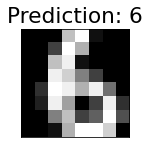

In [ ]:
# show one
show_digit()

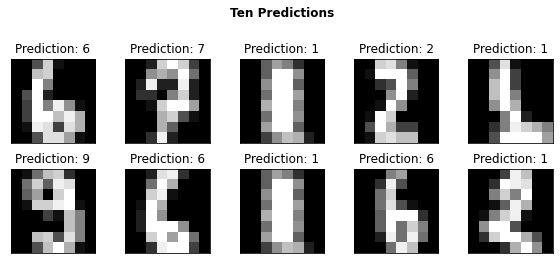

In [ ]:
# show ten
show_10_digits()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---